# Timeseries along the thalweg : Victoria Sill - Saanich Inlet (v202111b)

In [5]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean.cm as cm
import copy

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

import datetime as dt
import arrow
import copy
import math
import matplotlib.dates as mdates


In [96]:
df_gridT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_grid_T.nc')
df_gridU = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_grid_U.nc')
df_gridV = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_grid_V.nc')
df_chemT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_chem_T.nc')
df_biolT = xr.open_mfdataset('/data/atall/MEOPAR/SalishSeaCast/results/monthly/SalishSea_1m_201*_biol_T.nc')

thalweg_file = '/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/SaanichInlet_VictoriaSill_thalweg.txt'

In [3]:
mesh = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')

meshb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/analysis-abdoul/notebooks/bathy/bathymetry_202310b.nc')

depthb = meshb.variables['gdept_0'][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)


In [97]:
df_biolT.nitrate.shape

(17, 40, 898, 398)

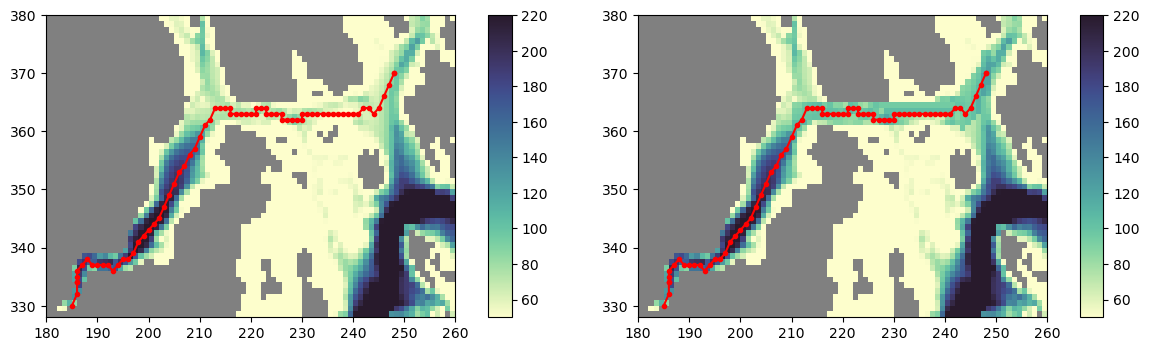

In [84]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, ax = plt.subplots(1, 2, figsize=(14, 6))
mycmap = cm.deep
mycmap.set_bad('grey')
im = ax[0].pcolormesh(bathy.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[0].plot(thalweg_pts[:,1],thalweg_pts[:,0],marker='.',color='r')
im2 = ax[1].pcolormesh(bathyb.variables['Bathymetry'][:], cmap=mycmap, vmin=50, vmax=220)
ax[1].plot(thalweg_pts[:,1],thalweg_pts[:,0],marker='.',color='r')
viz_tools.set_aspect(ax[0]);
viz_tools.set_aspect(ax[1]);
ax[0].set_xlim([180, 260])
ax[0].set_ylim([328, 380])
ax[1].set_xlim([180, 260])
ax[1].set_ylim([328, 380])
divider = make_axes_locatable(ax[0])
divider2 = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cax2 = divider2.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
fig.colorbar(im2, cax=cax2, orientation='vertical')

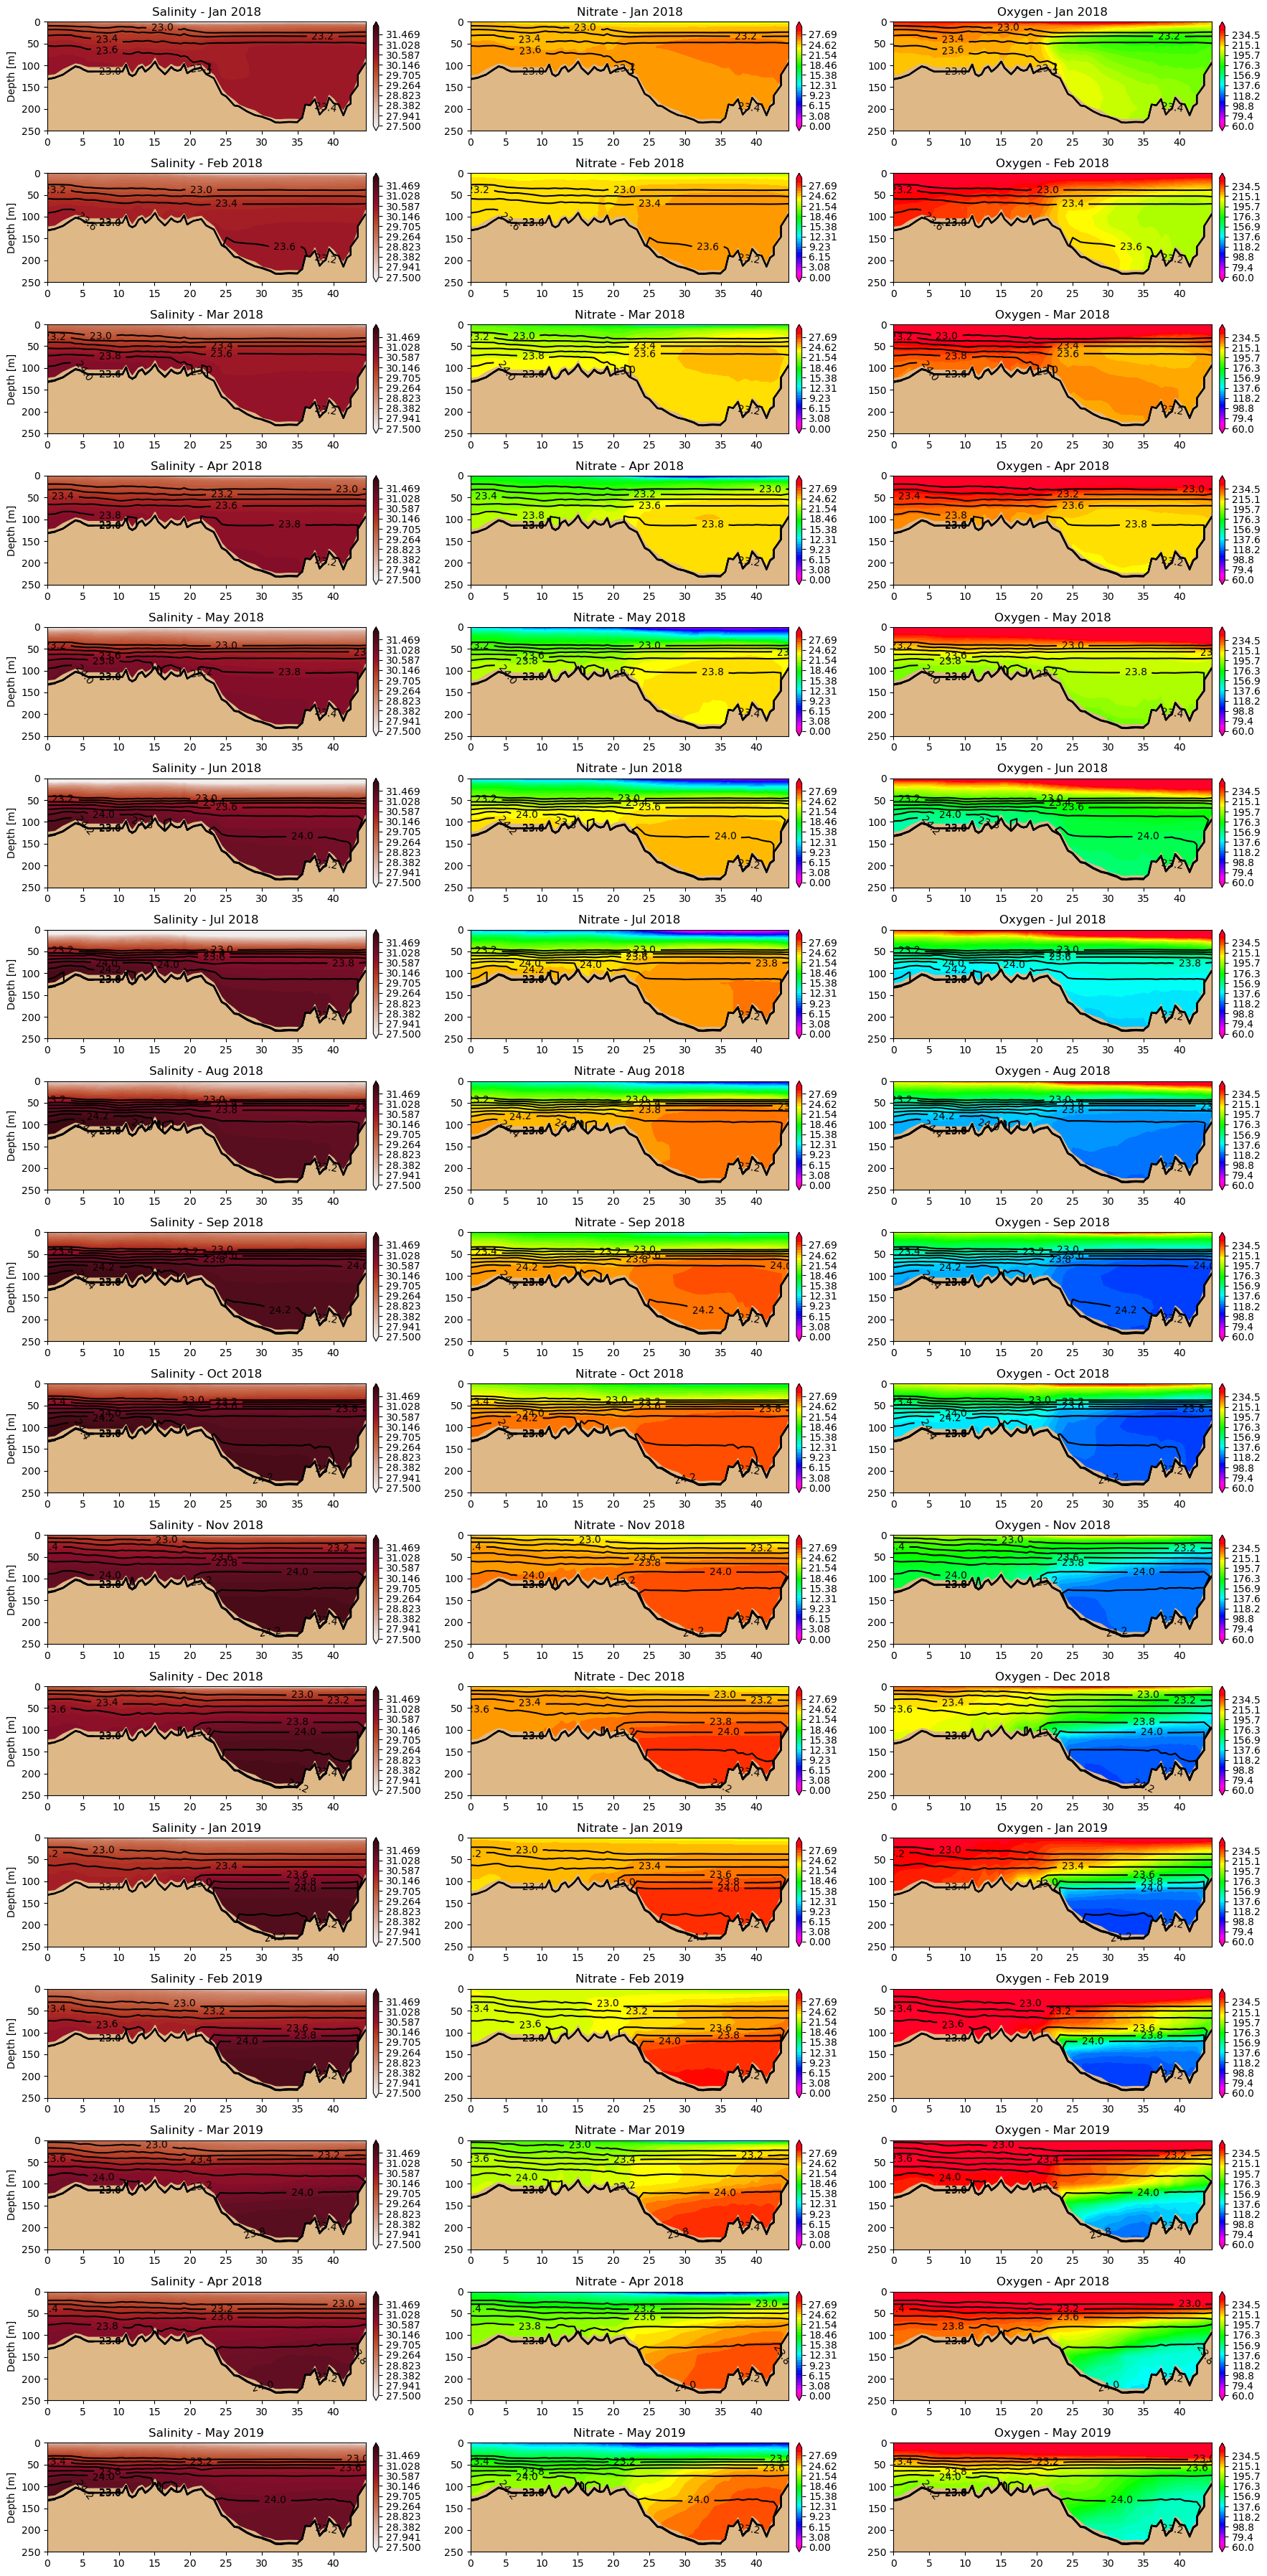

In [116]:
fig, axs = plt.subplots(17, 3, figsize=(18, 3*12))
lp, cpsal, cpnit, cpoxy = 0, 0, 1, 2
Month = list(['Dec 2017',
        'Jan 2018','Feb 2018','Mar 2018','Apr 2018','May 2018','Jun 2018','Jul 2018','Aug 2018','Sep 2018','Oct 2018','Nov 2018','Dec 2018',
        'Jan 2019','Feb 2019','Mar 2019','Apr 2018','May 2019','Jun 2019','Jul 2019','Aug 2019','Sep 2019','Oct 2019','Nov 2019','Dec 2019'])
for month in range(1, 17+1):
    dep_thal, distance, sal_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_gridT.vosaline[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, den_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_gridT.sigma_theta[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, nit_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.nitrate[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, dia_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.diatoms[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, fla_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_biolT.flagellates[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    dep_thal, distance, oxy_thal = vis.load_thalweg(
                depthb[0, ...], np.array(df_chemT.dissolved_oxygen[month-1]), bathyb['nav_lon'][:], bathyb['nav_lat'][:],
                thalweg_pts)
    sal_plot = vis._fill_in_bathy(sal_thal, meshb, thalweg_pts)
    den_plot = vis._fill_in_bathy(den_thal, meshb, thalweg_pts)
    nit_plot = vis._fill_in_bathy(nit_thal, meshb, thalweg_pts)
    dia_plot = vis._fill_in_bathy(dia_thal, meshb, thalweg_pts)
    fla_plot = vis._fill_in_bathy(fla_thal, meshb, thalweg_pts)
    oxy_plot = vis._fill_in_bathy(oxy_thal, meshb, thalweg_pts)
    colours_sal = axs[lp,cpsal].contourf(distance, dep_thal, sal_plot, np.linspace(27.5, 31.8, 40), 
                                     cmap=cm.amp, extend='both')
    colours_nit = axs[lp,cpnit].contourf(distance, dep_thal, nit_plot, np.linspace(0, 30, 40), 
                                     cmap='gist_rainbow_r', extend='both')
    colours_oxy = axs[lp,cpoxy].contourf(distance, dep_thal, oxy_plot, np.linspace(60, 250, 50),                                     
    #        [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120,
    #        125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185,
    #        190, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
    #        260, 265, 270, 275, 280, 285, 290, 295, 300],
                                    cmap='gist_rainbow_r', extend='both')
    CdenSal = axs[lp,cpsal].contour(distance, dep_thal, den_plot, np.arange(23., 27, 0.2),
                                     colors='k', extend='both')
    CdenNit = axs[lp,cpnit].contour(distance, dep_thal, den_plot, np.arange(23, 27, 0.2),
                                     colors='k', extend='both')
    CdenOxy = axs[lp,cpoxy].contour(distance, dep_thal,  den_plot, np.arange(23, 27, 0.2),
                                     colors='k', extend='both')
    axs[lp,cpsal].clabel(CdenSal, inline=True, fontsize=10)
    axs[lp,cpnit].clabel(CdenNit, inline=True, fontsize=10)
    axs[lp,cpoxy].clabel(CdenOxy, inline=True, fontsize=10)
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpsal], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpnit], color='burlywood')
    vis._add_bathy_patch(
    distance, bathyb['Bathymetry'][:], thalweg_pts, axs[lp,cpoxy], color='burlywood')
    axs[lp,cpsal].invert_yaxis()
    axs[lp,cpnit].invert_yaxis()
    axs[lp,cpoxy].invert_yaxis()
    axs[lp,cpsal].set_ylim(250, 0)
    axs[lp,cpnit].set_ylim(250, 0)
    axs[lp,cpoxy].set_ylim(250, 0)
    axs[lp,cpsal].set_ylabel('Depth [m]');
    axs[lp,cpsal].set_title(f'Salinity - {Month[month]}')
    axs[lp,cpnit].set_title(f'Nitrate - {Month[month]}')
    axs[lp,cpoxy].set_title(f'Oxygen - {Month[month]}')
    cbar = fig.colorbar(colours_sal, ax=axs[lp,cpsal], pad=0.02)
    cbar = fig.colorbar(colours_nit, ax=axs[lp,cpnit], pad=0.02)
    cbar = fig.colorbar(colours_oxy, ax=axs[lp,cpoxy], pad=0.02)
    lp = lp + 1;
#fig.suptitle('Year 2018 - v202111b - Victoria Sill - Saanich Inlet');
fig.tight_layout();

# What about the biology : cholophyll and primary production